**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is**


**Data Description -**

*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET

In [2]:
df = pd.read_csv("data_mobile_price_range.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
len(df.columns)

21

In [6]:
df.tail

<bound method NDFrame.tail of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width

# DATA ANALYSIS

In [7]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


minimum value of px_height and sc_w cannot be zero so we need to handle that

In [9]:
# Total phones with sc_w = 0
print(len(df[df.sc_w==0]))
# Total phines with px_height==0
print(len(df[df.px_height==0]))

180
2


In [10]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [11]:
df['sc_w']

0        7.0
1        3.0
2        2.0
3        8.0
4        2.0
        ... 
1995     4.0
1996    10.0
1997     1.0
1998    10.0
1999     4.0
Name: sc_w, Length: 2000, dtype: float64

In [12]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

There are no duplicate value

In [13]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null value in dataset

# Exploratory Data Analysis

**price**

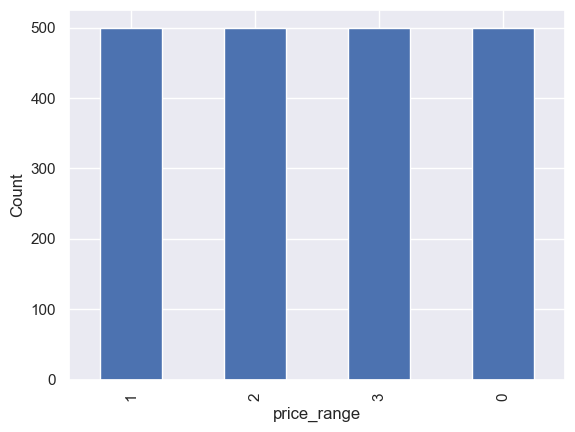

In [15]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

there are mobile phones in 4 price ranges. The number of elements is almost similar.

**Battery Power**

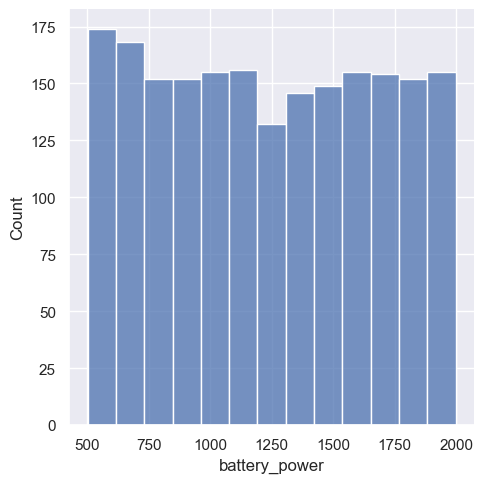

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

this plot shows how the battery mAh is spread.
 there is a gradual increase as the price range increases

**Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

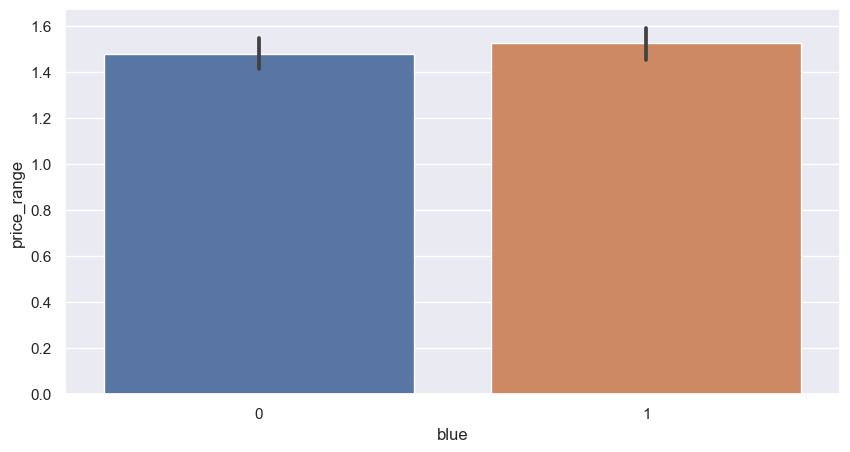

In [17]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

 half the devices have Bluetooth, and half don’t.

**ram**

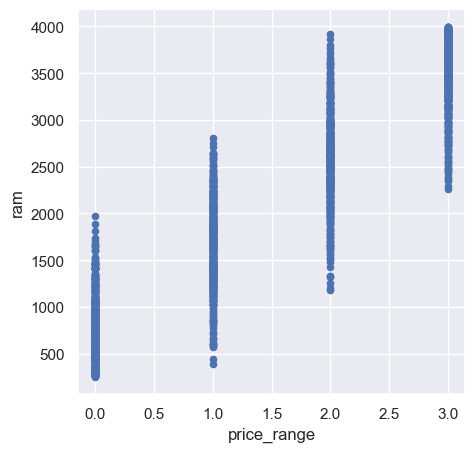

In [18]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost

**pixel_width**

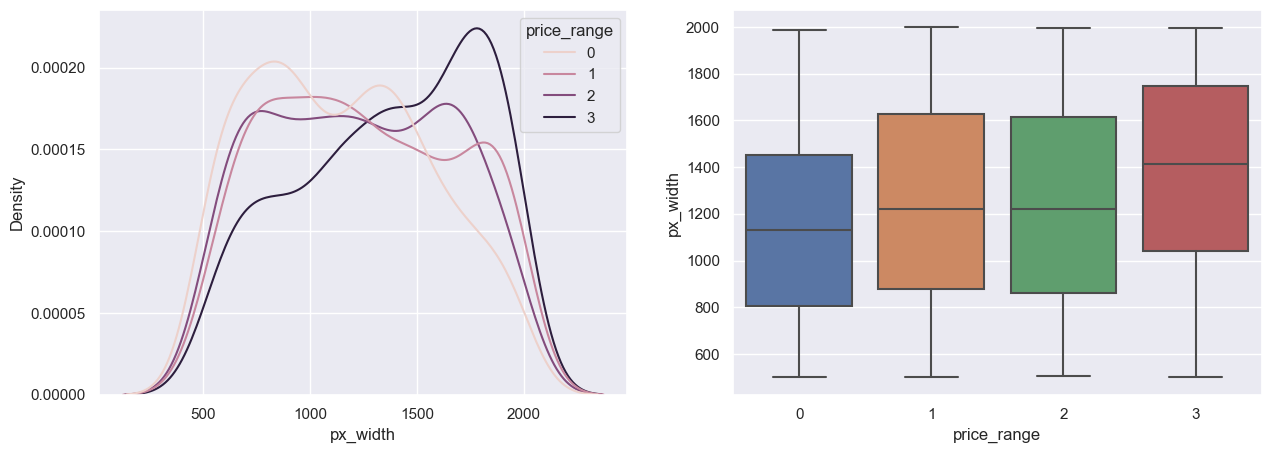

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.
so we can say that it would be a driving factor in deciding price_range.

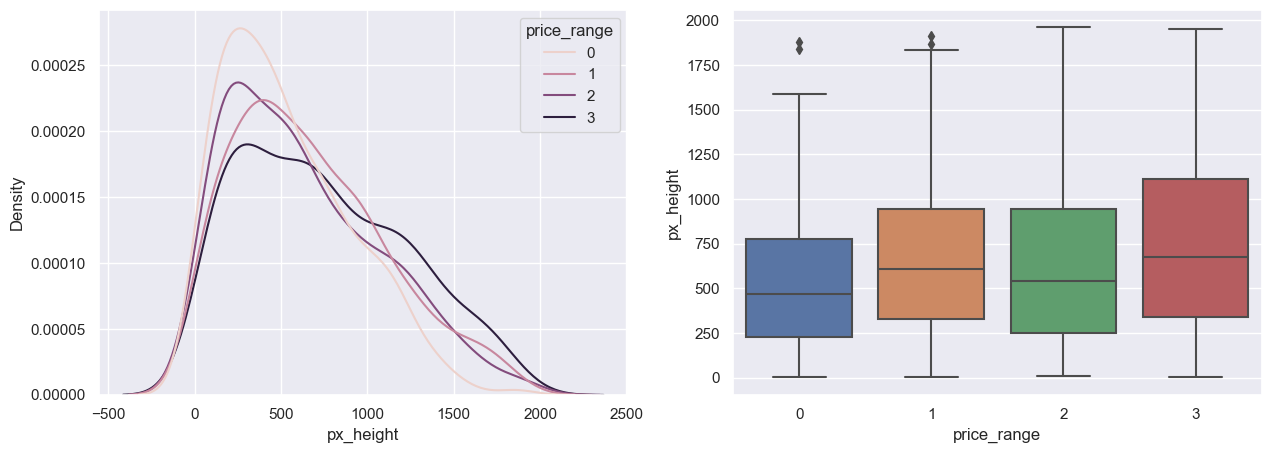

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

**FC(front camera megapixel)**

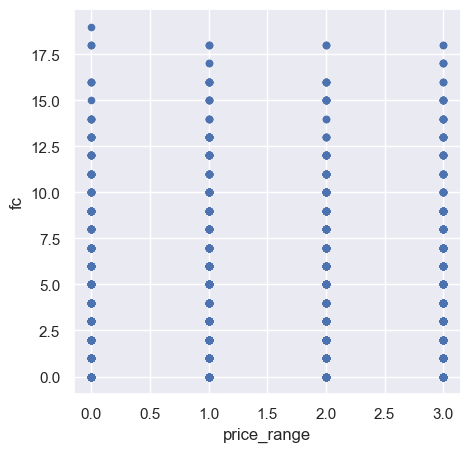

In [21]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

**PC(promary camera megapixel)**

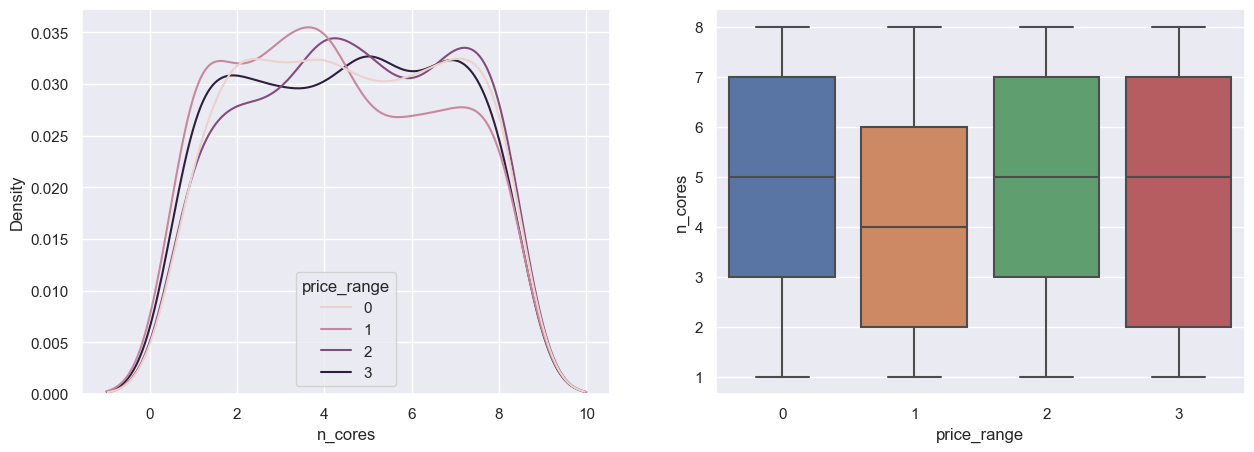

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.


**mobile weight**

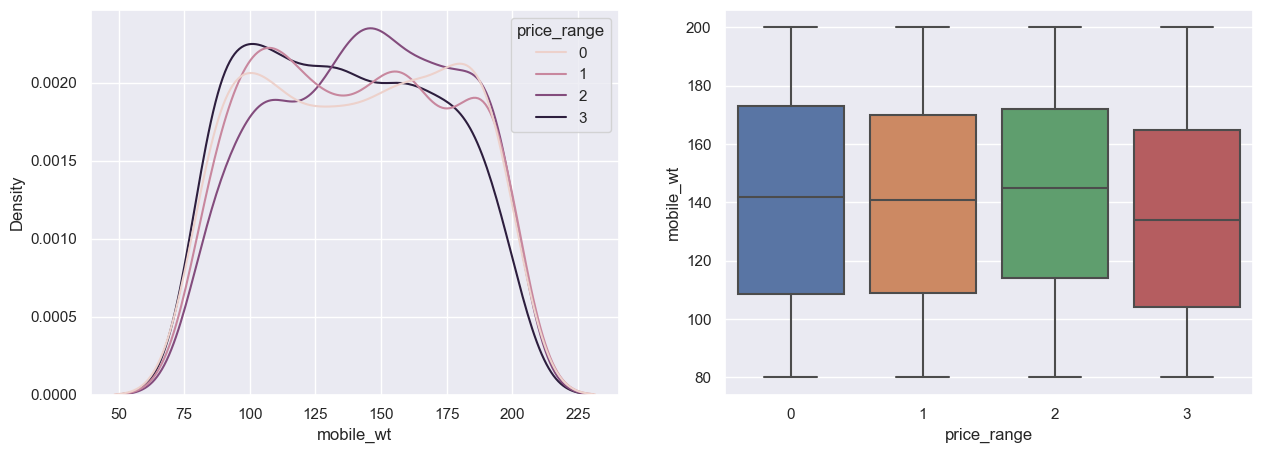

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

costly phones are lighter

**screen_size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

In [24]:
# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

In [25]:
df['sc_size']

0       4.49
1       6.80
2       4.40
3       7.04
4       3.25
        ... 
1995    5.35
1996    5.85
1997    3.57
1998    8.11
1999    7.64
Name: sc_size, Length: 2000, dtype: float64

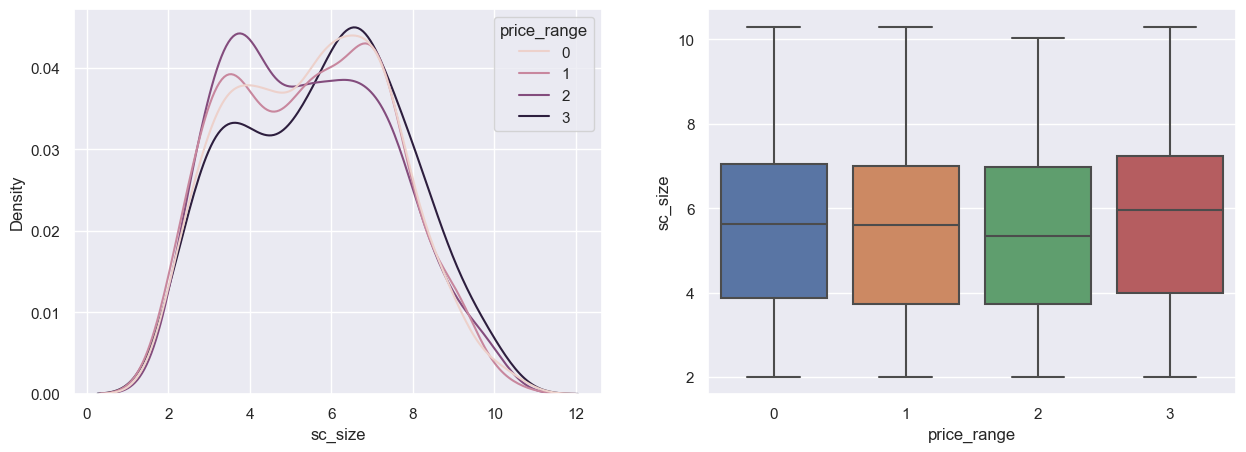

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

In [27]:
# Let's drop sc_h and s_w

df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [28]:
binary_features = [ 'four_g', 'three_g']

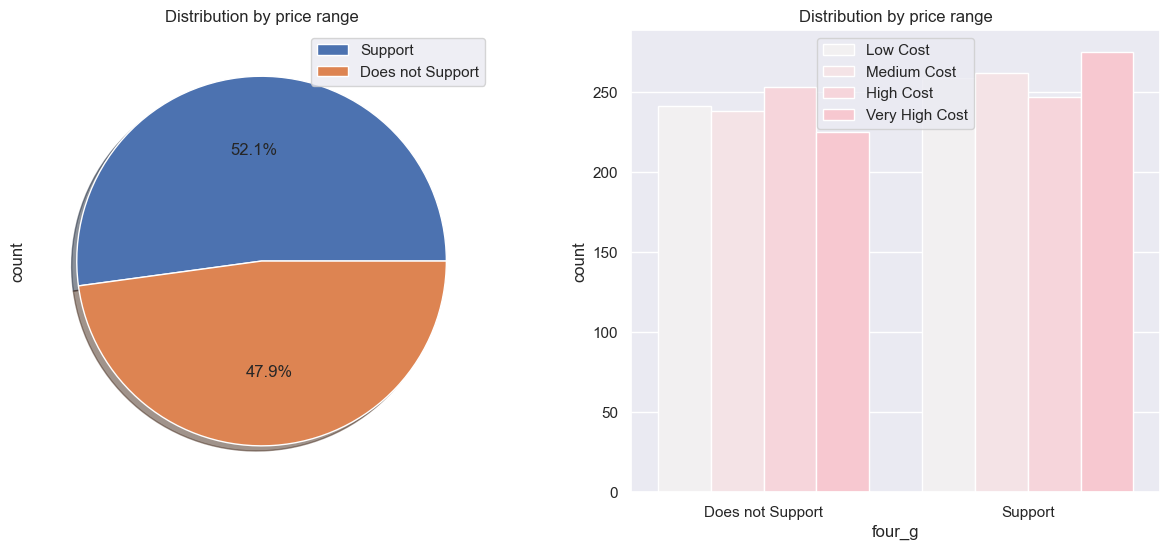

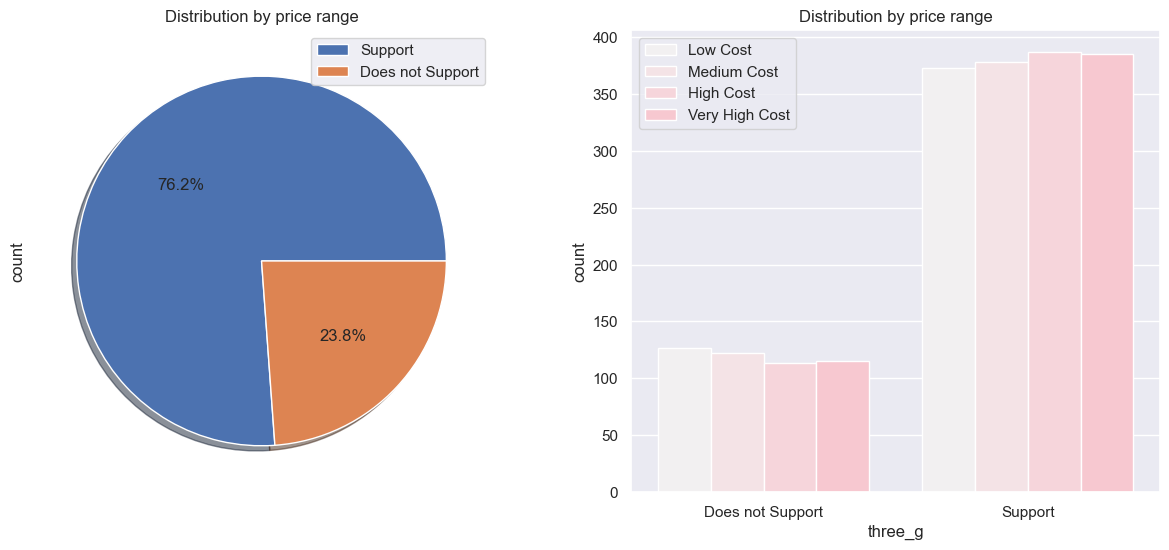

In [29]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

feature 'three_g' play an important feature in prediction

<Axes: >

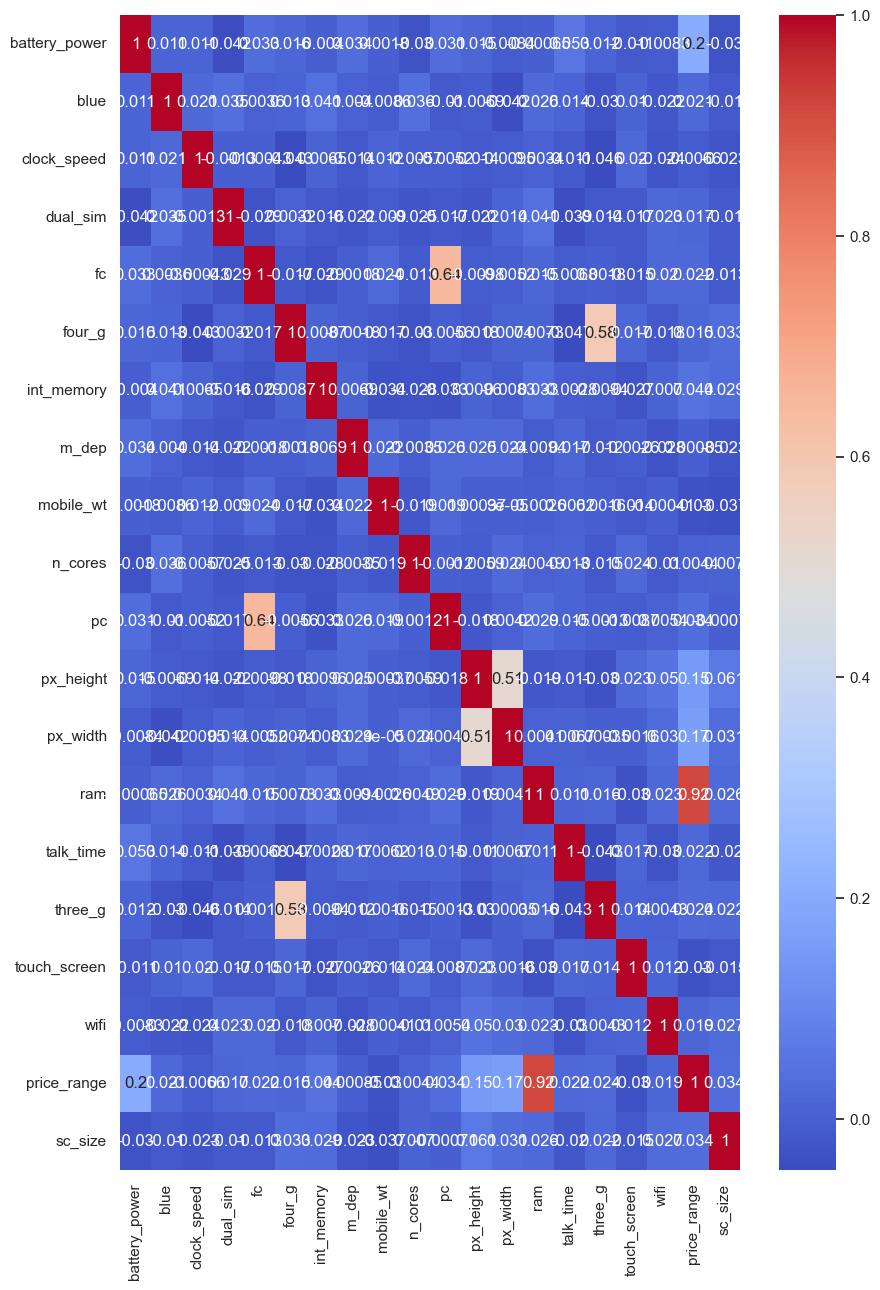

In [30]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [10, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation which is a good sign, it signifies 
that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.
Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

<Axes: >

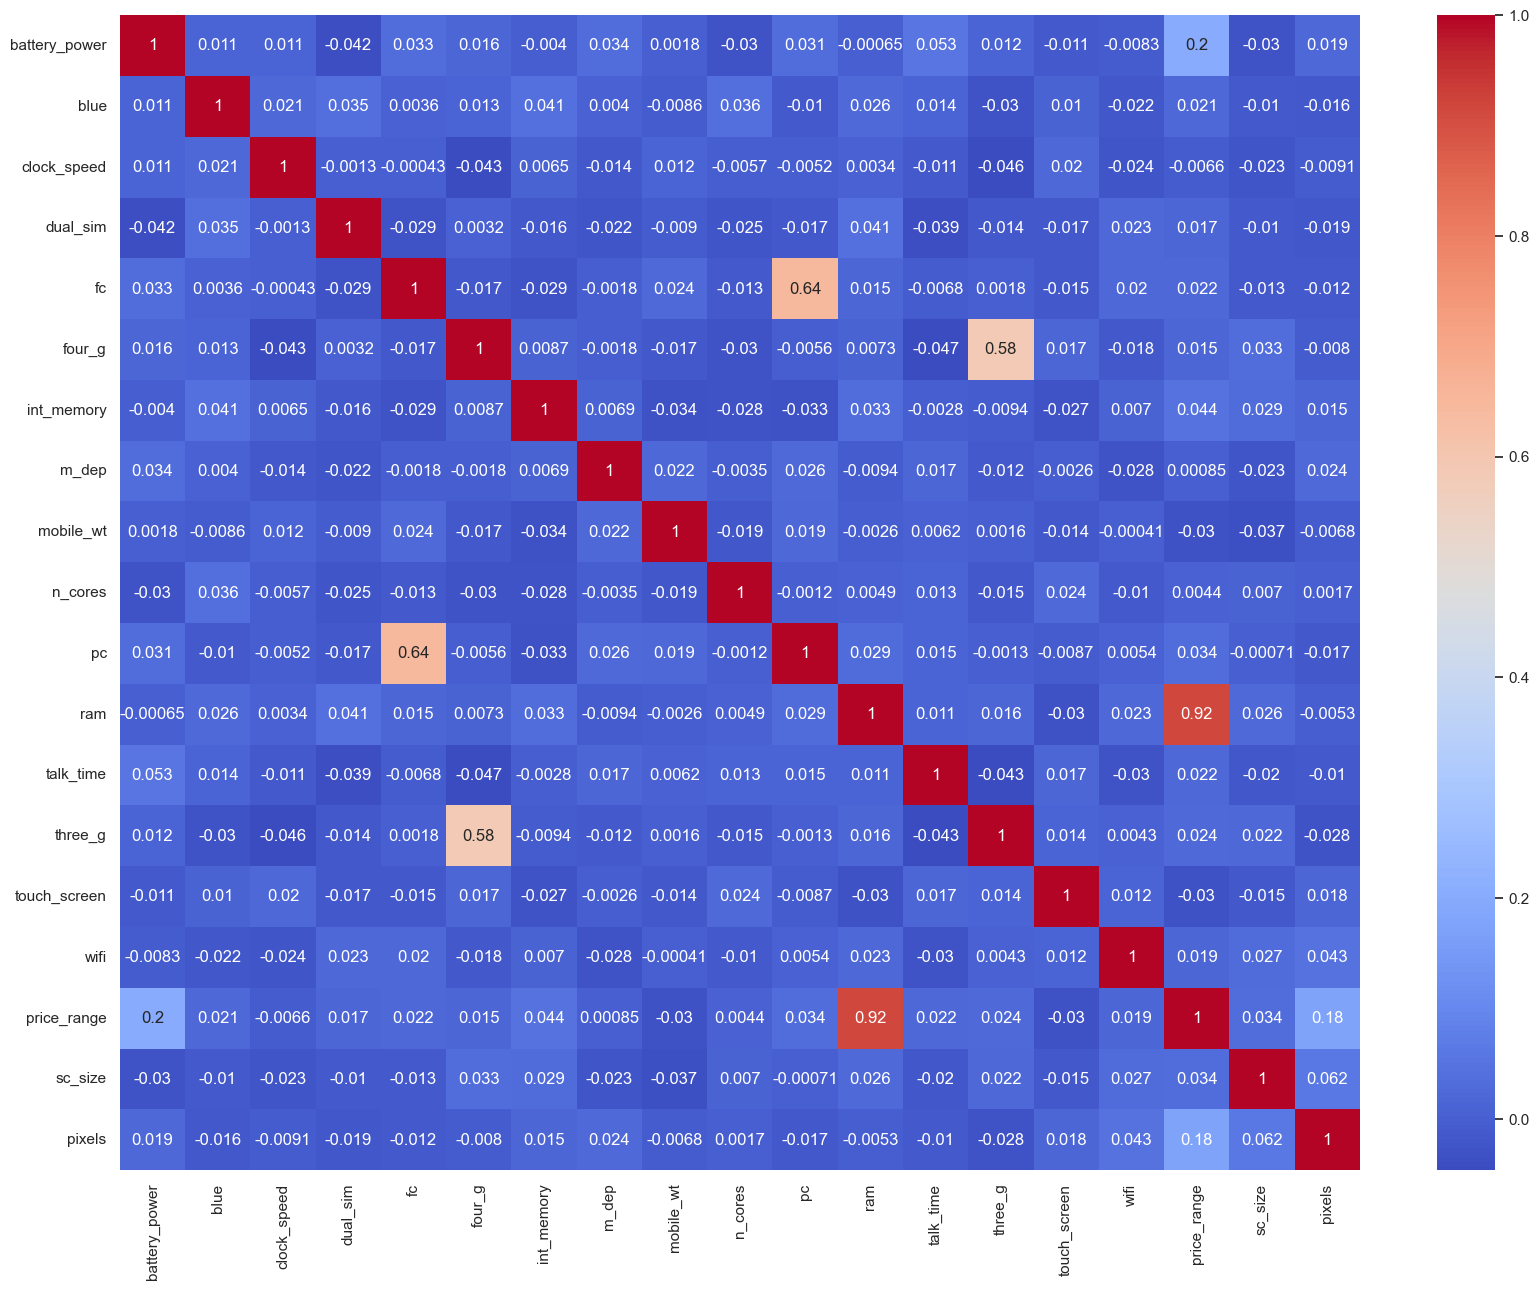

In [31]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

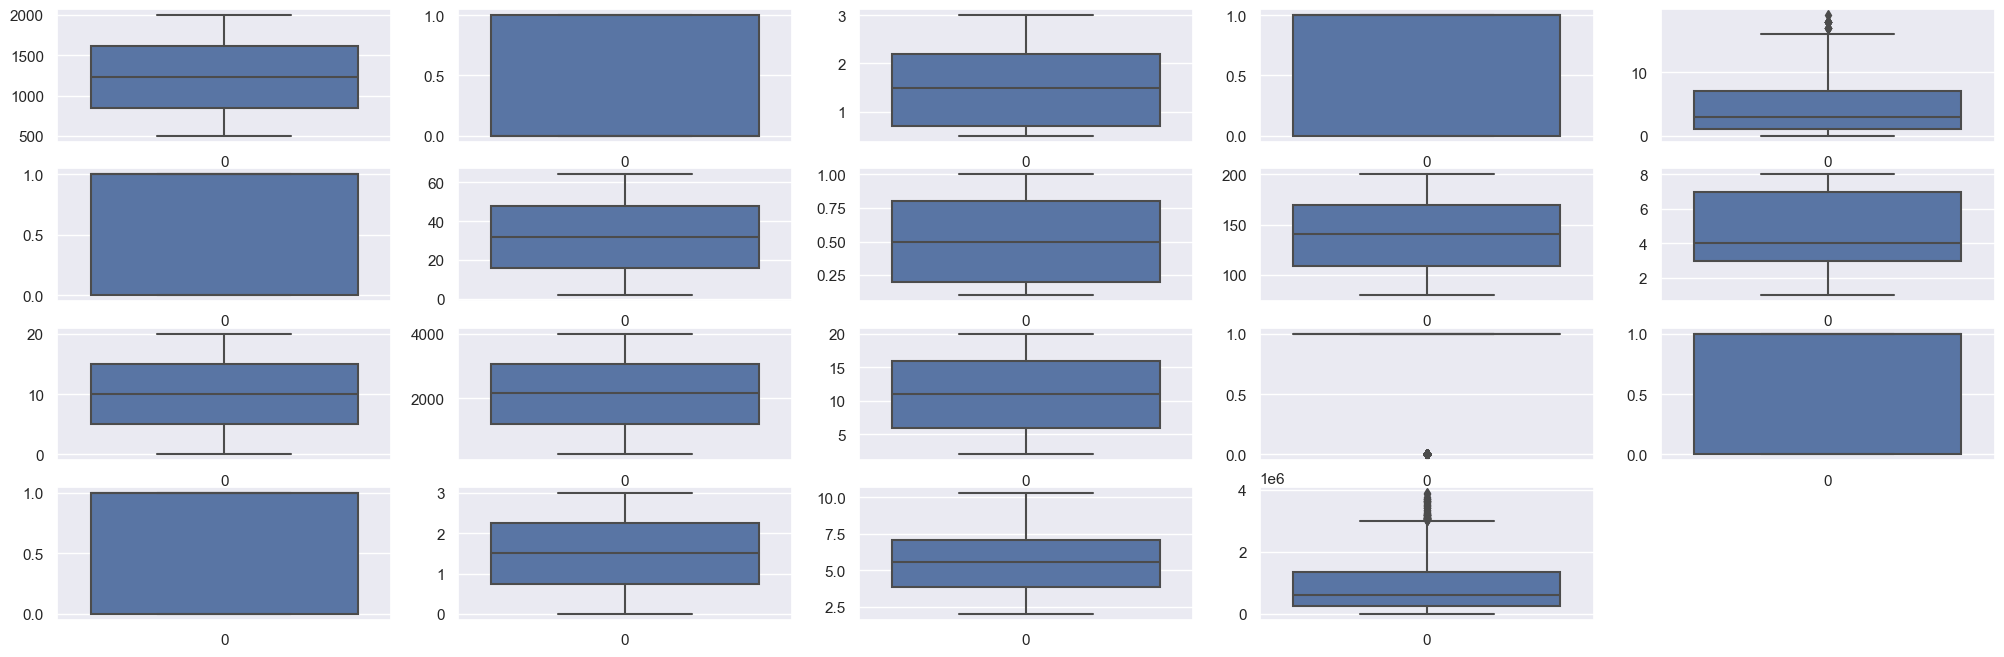

In [32]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

there are no much outliers

In [33]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [34]:
X.shape

(2000, 18)

In [35]:
y.shape

(2000,)

In [36]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [39]:
X_train.shape

(1600, 18)

In [40]:
y_train.shape

(1600,)

# Logistic Regression

In [41]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [43]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        92
           3       0.92      0.93      0.92       111

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[102   3   0   0]
 [  5  78   8   0]
 [  0   9  75   8]
 [  0   0   9 103]]


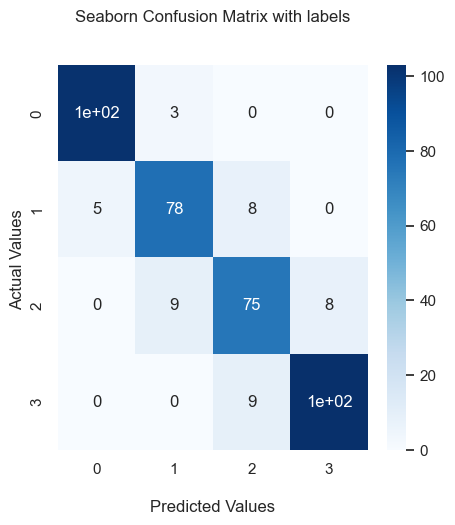

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.89      0.89      0.89       410
           2       0.86      0.90      0.88       388
           3       0.96      0.93      0.95       399

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



# Random Forest

In [46]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [48]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8725

In [49]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.85      0.85        91
           2       0.76      0.82      0.79        92
           3       0.93      0.86      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



[[101   4   0   0]
 [  6  77   8   0]
 [  0  10  75   7]
 [  0   0  16  96]]


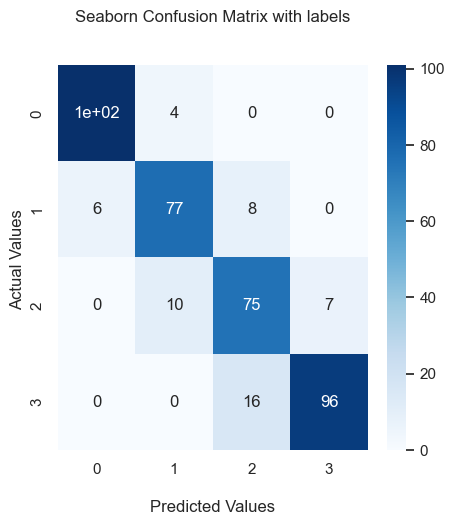

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.510271
1,battery_power,0.079472
2,pixels,0.073632
3,mobile_wt,0.043094
4,sc_size,0.041011


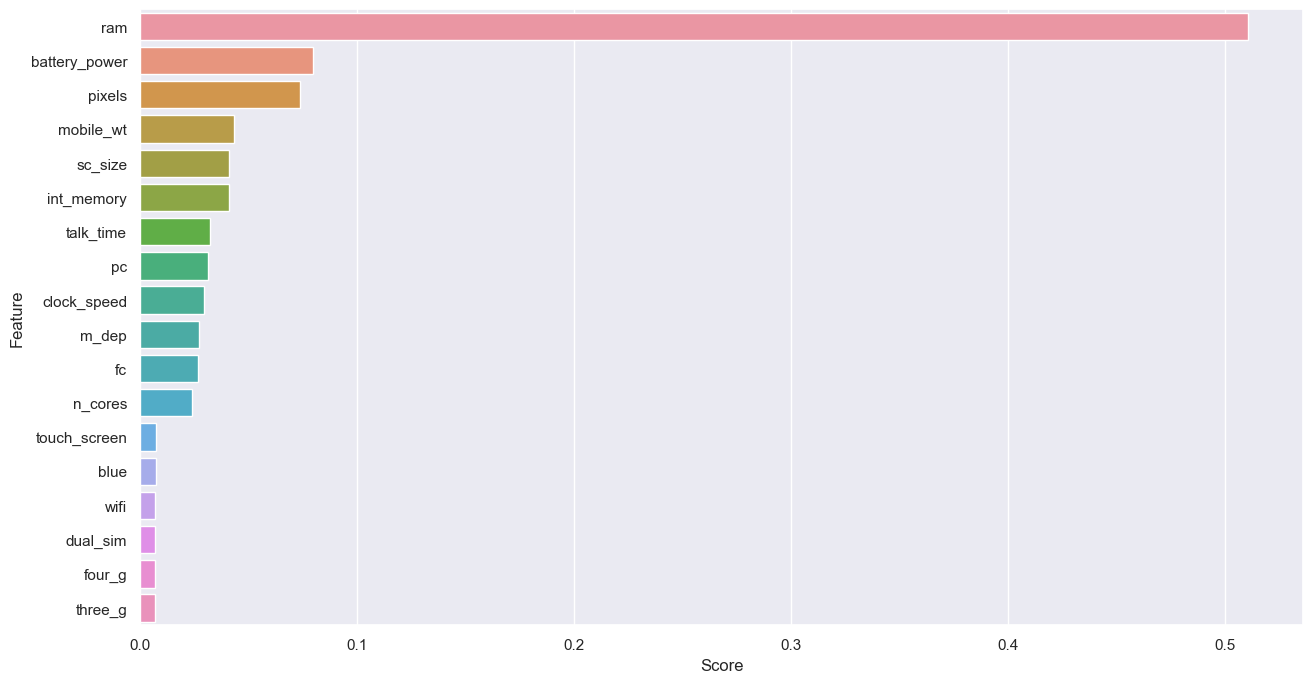

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**Hyperparameter tuning for Random Forest**

In [54]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [55]:
clsr.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 200}

In [56]:
clsr.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [57]:
clsr.best_score_

0.859492175834005

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [59]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.865

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.86      0.80      0.83        91
           2       0.76      0.79      0.78        92
           3       0.90      0.88      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



[[101   4   0   0]
 [  8  73  10   0]
 [  0   8  73  11]
 [  0   0  13  99]]


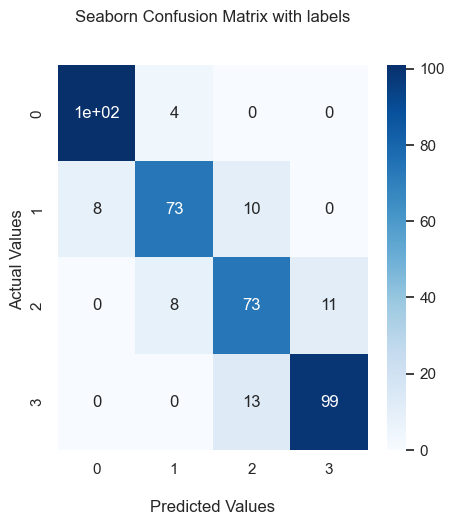

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [62]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.9475

In [63]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       395
           1       0.93      0.92      0.92       409
           2       0.92      0.93      0.93       408
           3       0.98      0.97      0.97       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [64]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.695803
1,battery_power,0.072432
2,pixels,0.061109
3,mobile_wt,0.027106
4,int_memory,0.024162


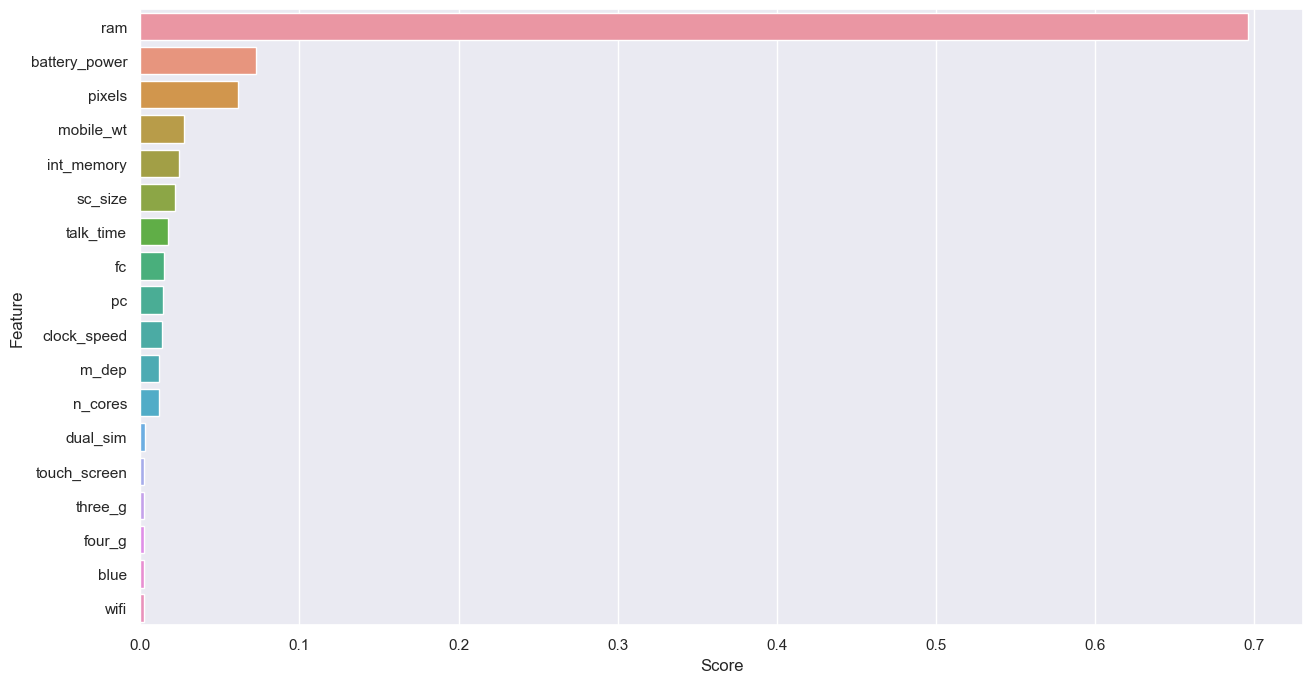

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# Decision tree 

In [66]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [68]:
accuracy_score(y_test, y_pred_test)

0.82

In [69]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



In [70]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [71]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.74      0.86      0.79        91
           2       0.77      0.70      0.73        92
           3       0.90      0.91      0.91       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



[[ 94  11   0   0]
 [  4  78   9   0]
 [  0  17  64  11]
 [  0   0  10 102]]


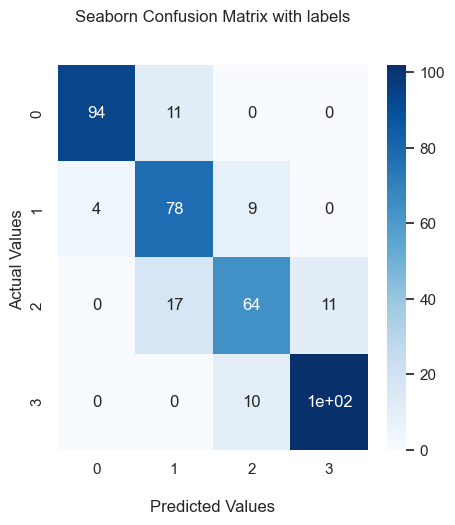

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



# xgboost

In [85]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 491.5 kB/s eta 0:03:23
   ---------------------------------------- 0.1/99.8 MB 722.1 kB/s eta 0:02:18
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:00:57
   ---------------------------------------- 0.8/99.8 MB 2.0 MB/s eta 0:00:50
   ------------------------------

In [86]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.90      0.86        91
           2       0.81      0.84      0.82        92
           3       0.95      0.88      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [87]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [88]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.891 total time=   0.0s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.866 total time=   0.0s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.844 total time=   0.0s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.872 total time=   0.0s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

[CV 1/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.875 total time=   0.0s
[CV 2/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 2/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.903 total time=   0.0s
[CV 3/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.866 total time=   0.0s
[CV 4/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.878 total time=   0.0s
[CV 5/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.891 total tim

[CV 3/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.881 total time=   0.1s
[CV 4/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.909 total time=   0.2s
[CV 5/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.891 total time=   0.2s
[CV 1/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.909 total time=   0.2s
[CV 2/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 5/5; 23/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.909 total time=   0.1s
[CV 1/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.881 total time=   0.1s
[CV 2/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.919 total time=   0.1s
[CV 3/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 3/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.897 total time=   0.1s
[CV 4/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 4/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, s

[CV 5/5; 31/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.816 total time=   0.0s
[CV 1/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 1/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.859 total time=   0.0s
[CV 2/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 2/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.878 total time=   0.0s
[CV 3/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 3/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.863 total time=   0.0s
[CV 4/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 4/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 2/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.863 total time=   0.0s
[CV 3/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 3/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.869 total time=   0.0s
[CV 4/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 4/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.828 total time=   0.0s
[CV 5/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 5/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.859 total time=   0.0s
[CV 1/5; 40/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 1/5; 40/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsampl

[CV 3/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.853 total time=   0.5s
[CV 4/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 4/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.847 total time=   0.4s
[CV 5/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 5/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.869 total time=   0.4s
[CV 1/5; 47/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 1/5; 47/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.897 total time=   0.6s
[CV 2/5; 47/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 2/5; 47/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimato

[CV 4/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.838 total time=   0.4s
[CV 5/5; 53/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 5/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.859 total time=   0.6s
[CV 1/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 1/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.8s
[CV 2/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 2/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.4s
[CV 3/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 3/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimato

[CV 5/5; 60/120] END gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.881 total time=   0.7s
[CV 1/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.863 total time=   0.0s
[CV 2/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.856 total time=   0.0s
[CV 3/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.0s
[CV 4/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 tot

[CV 2/5; 69/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.887 total time=   0.0s
[CV 3/5; 69/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 69/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.875 total time=   0.0s
[CV 4/5; 69/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 69/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.869 total time=   0.0s
[CV 5/5; 69/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 69/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.884 total time=   0.0s
[CV 1/5; 70/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3
[CV 1/5; 70/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=200, subsample=0.3;, score=0.85

[CV 4/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.897 total time=   0.1s
[CV 5/5; 76/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.881 total time=   0.2s
[CV 1/5; 77/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 77/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.900 total time=   0.2s
[CV 2/5; 77/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 77/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.891 total time=   0.1s
[CV 3/5; 77/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 3/5; 77/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 2/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.906 total time=   0.1s
[CV 3/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 3/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.894 total time=   0.1s
[CV 4/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 4/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.891 total time=   0.1s
[CV 5/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 5/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.906 total time=   0.1s
[CV 1/5; 85/120] START gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=10, s

[CV 5/5; 91/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.803 total time=   0.0s
[CV 1/5; 92/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 1/5; 92/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.869 total time=   0.0s
[CV 2/5; 92/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 2/5; 92/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.884 total time=   0.0s
[CV 3/5; 92/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 3/5; 92/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.856 total time=   0.0s
[CV 4/5; 92/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 4/5; 92/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 5/5; 99/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.856 total time=   0.0s
[CV 1/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 1/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.847 total time=   0.3s
[CV 2/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 2/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.859 total time=   0.3s
[CV 3/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 3/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3;, score=0.844 total time=   0.3s
[CV 4/5; 100/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 100/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators

[CV 1/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.894 total time=   0.4s
[CV 2/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 2/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.884 total time=   0.4s
[CV 3/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 3/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.869 total time=   0.4s
[CV 4/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 4/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.866 total time=   0.4s
[CV 5/5; 107/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 5/5; 107/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n

[CV 2/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.4s
[CV 3/5; 114/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 3/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.4s
[CV 4/5; 114/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 4/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.822 total time=   0.4s
[CV 5/5; 114/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 5/5; 114/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.4s
[CV 1/5; 115/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=10, subsample=0.3
[CV 1/5; 115/120] END gamma=1.8, learning_rate=0.001, max_depth=10, 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [89]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.86      0.90      0.88        91
           2       0.84      0.88      0.86        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[ 98   7   0   0]
 [  6  82   3   0]
 [  0   6  81   5]
 [  0   0  12 100]]


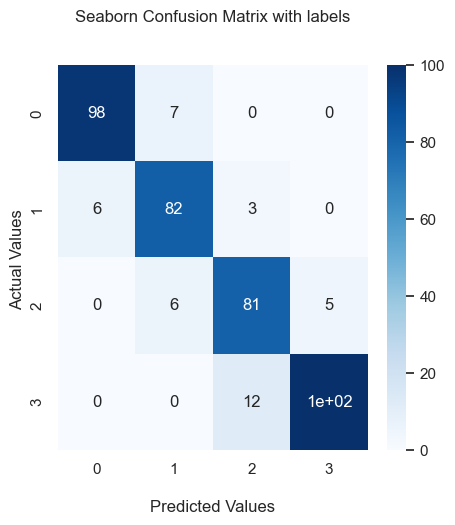

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.96      0.97      0.97       409
           2       0.96      0.96      0.96       408
           3       0.98      0.98      0.98       388

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



# Conclusion

1.  From EDA we can see that here are mobile phones in 4 price ranges. The    number of elements is almost similar. 
2.  half the devices have Bluetooth, and half don’t
3.   there is a gradual increase in battery as the price range increases
4.   Ram has continuous increase with price range while moving from Low cost to Very high cost
5.   costly phones are lighter
6.   RAM, battery power, pixels played more significant role in deciding the price range of mobile phone. 
7.   form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results